In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time


In [ ]:
data = pd.read_csv('F:\Grades.csv')

In [ ]:
data.head()

In [6]:
data.shape

(571, 43)

In [ ]:
data.info()

In [8]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [ ]:
data.isnull().sum()

In [ ]:
data.drop(['Seat No.'], axis=1, inplace=True)

In [ ]:

def encode(model):
    cols=model.columns
        
    for i in range(len(cols)-1):
        model[cols[i]]=model[cols[i]].replace(['A+','A-','A','B','B+','B-','C','C+','C-','D','D+','F','W','WU','I'],
                                              [4,3.7,4,3,3.3,2.7,2,2.3,1.7,1,1.3,0, 0,0,0])

In [ ]:
model1=data.iloc[:, :11]
model1['CGPA']=data['CGPA']

In [ ]:
encode(model1)
model1.head()


In [ ]:

def check_multicolinearity(model_inputs):
    plt.figure(figsize=(18,11))
    sns.heatmap(model_inputs.corr(),  annot=True, annot_kws={"size": 14})
    sns.set_style('white')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [ ]:
def check_null(model):
    model.isna().sum().sum()
    model.dropna(inplace=True)
    model.info()

In [ ]:
def LR_best_split(modelinputs, target):
    testsize=[0.1,0.2,0.25, 0.3, 0.35, 0.4,0.45,0.5,0.6,0.7]
    scores={}
    mse=[]
    for i in testsize:
        x_train, x_test, y_train, y_test=train_test_split(modelinputs, target,
                                                                             test_size=i, random_state=42)
        model_regr=LinearRegression()
        model_regr.fit(x_train, y_train)
        ypred=model_regr.predict(x_test)
        print("\nAt test size = ", i)
        t1=round(model_regr.score(x_train, y_train),3)
        t2=round(model_regr.score(x_test, y_test),3)
        mse.append(round(mean_squared_error(y_test, ypred),3))
        scores[i]=[t1,t2]
        print("training score:", t1, end='')
        print("| testing score:", t2, end='')
        print('| mean squared error: ', round(mean_squared_error(y_test, ypred),4))
    plt.plot(testsize, mse)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [ ]:
def LR_model(xtrain,ytrain,xtest):
    
    model1_regr=LinearRegression()
    model1_regr.fit(xtrain, ytrain)

    predicted=model1_regr.predict(xtest)
    return model1_regr,predicted

Text(0.5, 0, 'CGPA')

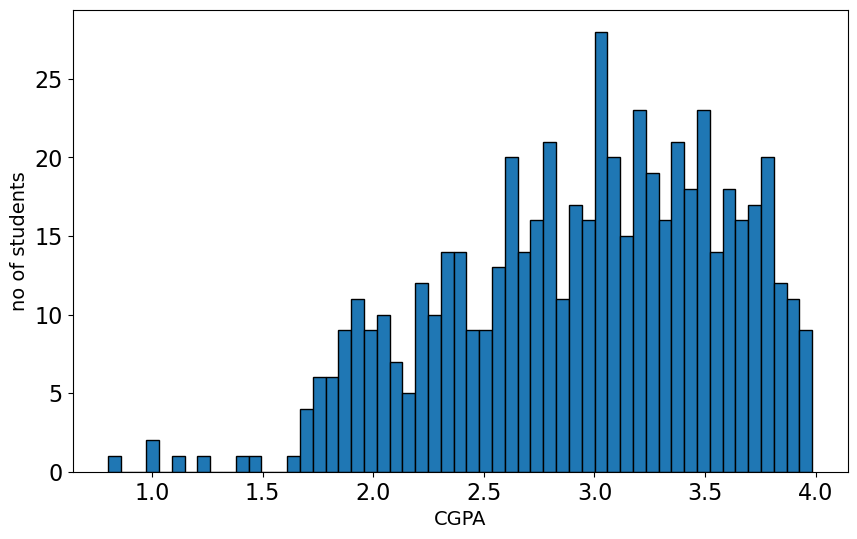

In [38]:
plt.figure(figsize=(10,6))
plt.hist(data["CGPA"], bins=55, ec='black')
plt.ylabel("no of students", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("CGPA", fontsize=14)

In [ ]:
model1=data.iloc[:, :11]
model1['CGPA']=data['CGPA']

In [ ]:
encode(model1)
model1.head()


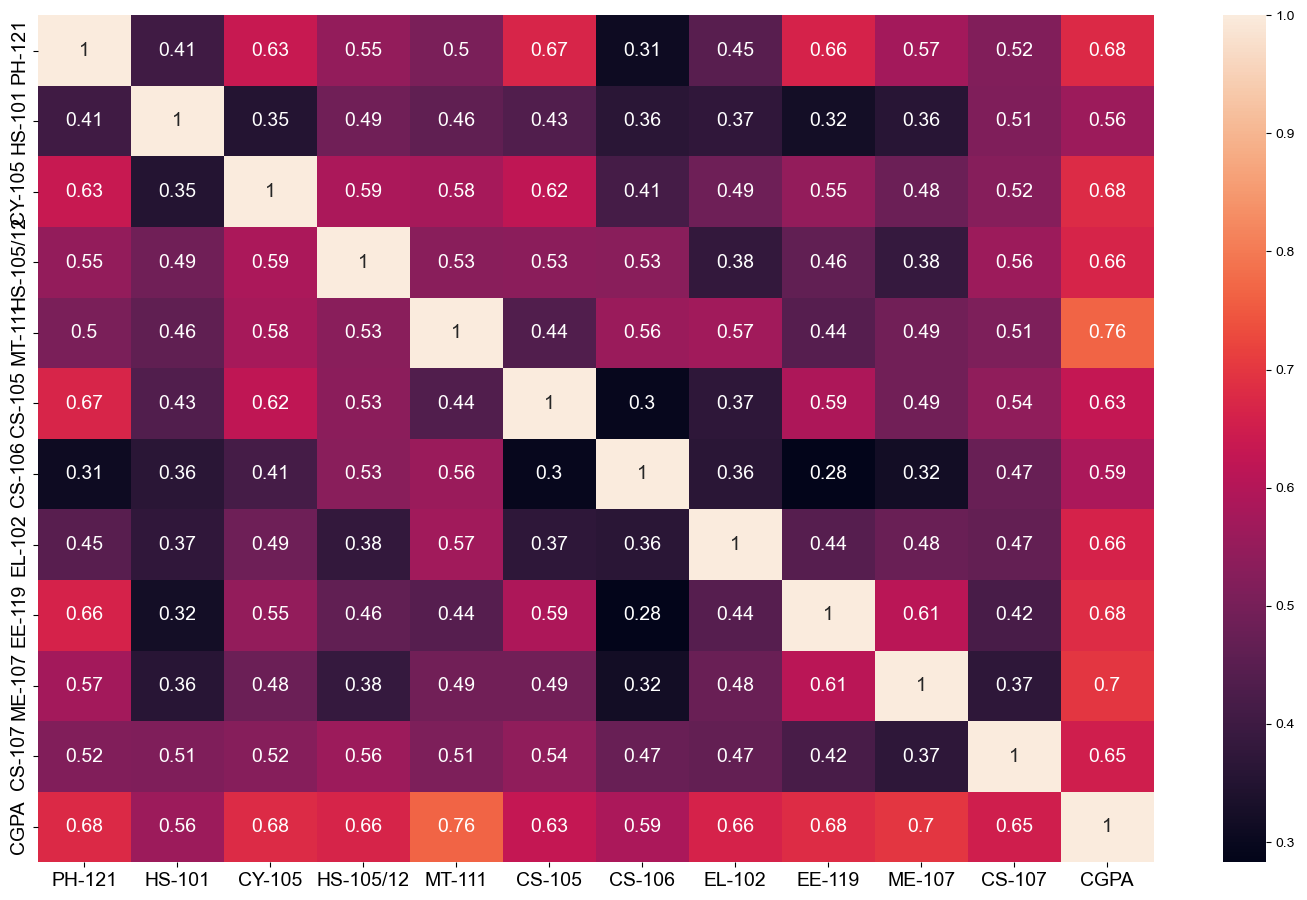

In [41]:
check_multicolinearity(model1)

In [ ]:
check_null(model1)

In [ ]:
model1_inputs=model1.drop('CGPA', axis=1)
model1_target=model1['CGPA']


At test size =  0.1
training score: 0.851| testing score: 0.865| mean squared error:  0.055

At test size =  0.2
training score: 0.86| testing score: 0.823| mean squared error:  0.0621

At test size =  0.25
training score: 0.864| testing score: 0.817| mean squared error:  0.0671

At test size =  0.3
training score: 0.863| testing score: 0.828| mean squared error:  0.0633

At test size =  0.35
training score: 0.855| testing score: 0.847| mean squared error:  0.0583

At test size =  0.4
training score: 0.856| testing score: 0.844| mean squared error:  0.0623

At test size =  0.45
training score: 0.85| testing score: 0.848| mean squared error:  0.0605

At test size =  0.5
training score: 0.854| testing score: 0.841| mean squared error:  0.0626

At test size =  0.6
training score: 0.851| testing score: 0.843| mean squared error:  0.0613

At test size =  0.7
training score: 0.863| testing score: 0.844| mean squared error:  0.0602


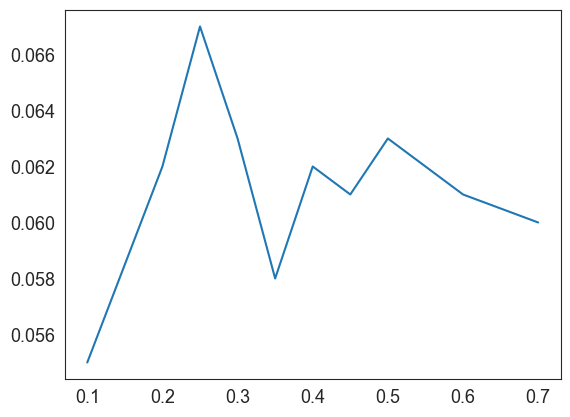

In [44]:
LR_best_split(model1_inputs, model1_target)

In [ ]:
model2=data.iloc[:, :22]
model2['CGPA']=data['CGPA']

In [ ]:
encode(model2)
model2.head()


In [ ]:
check_null(model2)

In [50]:
model2_inputs=model2.drop(['CGPA'], axis=1)
model2_target=model2['CGPA']

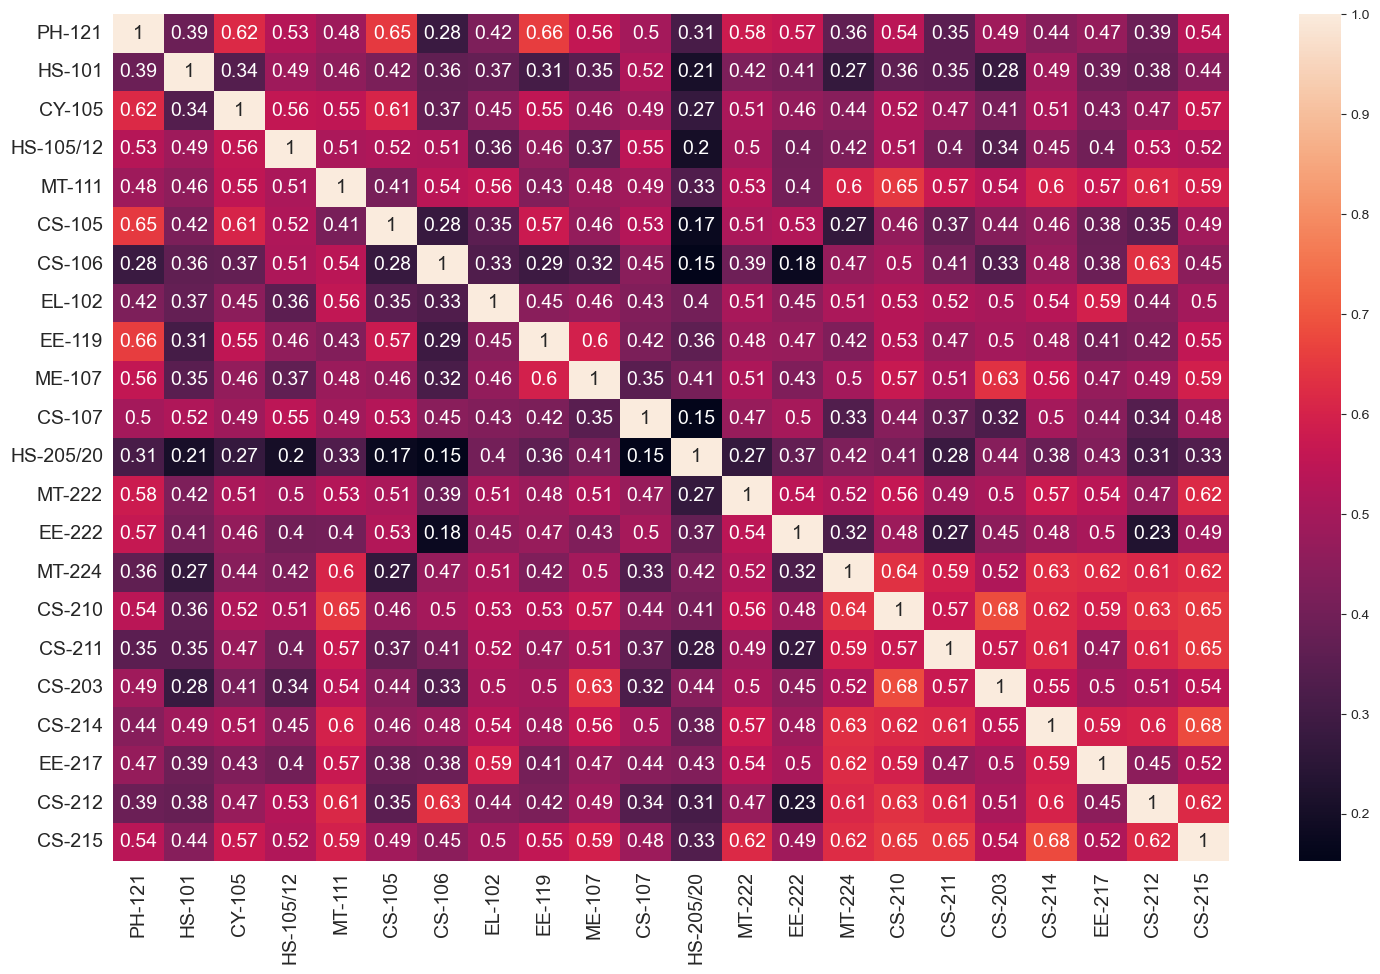

In [51]:
check_multicolinearity(model2_inputs)


In [ ]:
LR_best_split(model2_inputs, model2_target)

In [ ]:
model3=data.iloc[:, :34]
model3['CGPA']=data['CGPA']
model3.drop('MT-442', axis=1, inplace=True)

In [ ]:
encode(model3)
model3.head()

In [55]:
check_null(model3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 570
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     559 non-null    float64
 1   HS-101     559 non-null    float64
 2   CY-105     559 non-null    float64
 3   HS-105/12  559 non-null    float64
 4   MT-111     559 non-null    float64
 5   CS-105     559 non-null    float64
 6   CS-106     559 non-null    float64
 7   EL-102     559 non-null    float64
 8   EE-119     559 non-null    float64
 9   ME-107     559 non-null    float64
 10  CS-107     559 non-null    float64
 11  HS-205/20  559 non-null    float64
 12  MT-222     559 non-null    float64
 13  EE-222     559 non-null    float64
 14  MT-224     559 non-null    float64
 15  CS-210     559 non-null    float64
 16  CS-211     559 non-null    float64
 17  CS-203     559 non-null    float64
 18  CS-214     559 non-null    float64
 19  EE-217     559 non-null    float64
 20  CS-212    

In [ ]:
model3_target=model3['CGPA']
model3_inputs=model3.drop('CGPA', axis=1)

In [ ]:
check_multicolinearity(model3_inputs)



At test size =  0.1
training score: 0.991| testing score: 0.985| mean squared error:  0.0051

At test size =  0.2
training score: 0.991| testing score: 0.988| mean squared error:  0.0039

At test size =  0.25
training score: 0.991| testing score: 0.99| mean squared error:  0.0038

At test size =  0.3
training score: 0.991| testing score: 0.988| mean squared error:  0.0041

At test size =  0.35
training score: 0.991| testing score: 0.988| mean squared error:  0.0042

At test size =  0.4
training score: 0.993| testing score: 0.985| mean squared error:  0.0053

At test size =  0.45
training score: 0.994| testing score: 0.985| mean squared error:  0.005

At test size =  0.5
training score: 0.993| testing score: 0.986| mean squared error:  0.0049

At test size =  0.6
training score: 0.994| testing score: 0.986| mean squared error:  0.0045

At test size =  0.7
training score: 0.994| testing score: 0.987| mean squared error:  0.0046


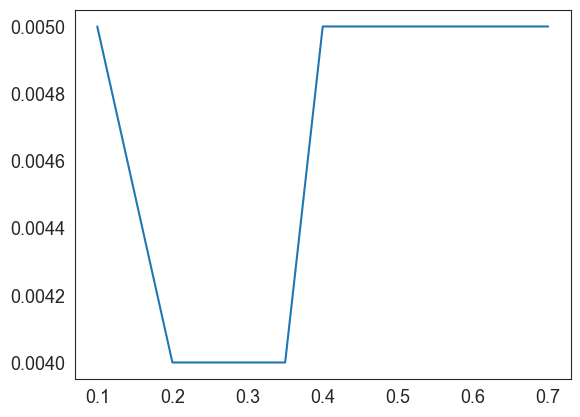

In [59]:
LR_best_split(model3_inputs, model3_target)

In [ ]:
def inputs(model_cols, model1_inputs, model1_target,model2_inputs,model2_target, model3_inputs,model3_target):
    grades=[]
    valid_grades=['A+','A-','A','B','B+','B-','C','C+','C-','D','D+','F','W','WU','I']
    for i in range(len(model_cols)-1):
            
        print(model_cols[i], ": ", end='')
        n=input()
        while n not in valid_grades:
            print("Invalid grade try again")
            print(model_cols[i], ": ", end='')
            n=input()
        grades.append(n)
    print("\nObtained grades : ",grades)
    grades_=pd.DataFrame(grades)
    grades_['serial_No']=np.arange(len(model_cols)-1)
    encode(grades_)
    grades_=np.array(grades_[0])
    
    print("\n \nUSING FE COURSES\n")
    algos(model1_inputs,model1_target, [grades_[0:11]], 10,2)
    
    print("\n \nUSING FE AND SE COURSES\n")
    algos(model2_inputs, model2_target, [grades_[0:22]],21,2)
    
    print("\n \nUSING FE, SE, TE COURSES\n")
    algos(model3_inputs, model3_target, [grades_[0:33]], 9 ,4)

In [ ]:

def main():
    model3_cols=model3.columns
    inputs(model3_cols,  model1_inputs, model1_target, model2_inputs,model2_target, model3_inputs,model3_target)

In [ ]:
main()